<a href="https://colab.research.google.com/github/arindalestari/Taylor-Swift-Data-Viz-and-Modelling/blob/main/Taylor_swift_song_popularity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Taylor Swift Spotify EDA dan Predicting Song Popularity**

Dataset yang digunakan diambil dari website https://www.kaggle.com/datasets/jarredpriester/taylor-swift-spotify-dataset/data pada bulan Juni 2024.

# Instalasi Package

In [1]:
import pandas as pd
import numpy as np
import random

# Models
from sklearn import ensemble
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.linear_model import ElasticNet
import xgboost as xg
from sklearn.metrics import r2_score, mean_squared_error, mean_gamma_deviance

# Data Vis
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving taylor_swift_spotify.csv to taylor_swift_spotify.csv


In [3]:
# Memuat data atau membaca data
ts = pd.read_csv("taylor_swift_spotify.csv")
#(rows, columns)
ts.shape

(566, 18)

In [4]:
ts.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Fortnight (feat. Post Malone),THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,1,6dODwocEuGzHAavXqTbwHv,spotify:track:6dODwocEuGzHAavXqTbwHv,0.5020,0.504,0.386,0.000015,0.0961,-10.976,0.0308,192.004,0.281,89,228965
1,1,The Tortured Poets Department,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,2,4PdLaGZubp4lghChqp8erB,spotify:track:4PdLaGZubp4lghChqp8erB,0.0483,0.604,0.428,0.000000,0.1260,-8.441,0.0255,110.259,0.292,87,293048
2,2,My Boy Only Breaks His Favorite Toys,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,3,7uGYWMwRy24dm7RUDDhUlD,spotify:track:7uGYWMwRy24dm7RUDDhUlD,0.1370,0.596,0.563,0.000000,0.3020,-7.362,0.0269,97.073,0.481,88,203801
3,3,Down Bad,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,4,1kbEbBdEgQdQeLXCJh28pJ,spotify:track:1kbEbBdEgQdQeLXCJh28pJ,0.5600,0.541,0.366,0.000001,0.0946,-10.412,0.0748,159.707,0.168,89,261228
4,4,"So Long, London",THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,5,7wAkQFShJ27V8362MqevQr,spotify:track:7wAkQFShJ27V8362MqevQr,0.7300,0.423,0.533,0.002640,0.0816,-11.388,0.3220,160.218,0.248,88,262974


Informasi mengenai variabel pada dataset:
1. name: nama lagu
2. album: nama album
3. release_date: hari bulan dan tahun album dirilis
4. track number: urutan kemunculan lagu di album
5. id: id Spotify untuk lagu tersebut
6. uri: uri Spotify untuk lagu tersebut
7. acousticness: Ukuran keyakinan dari 0,0 hingga 1,0 apakah trek tersebut akustik. 1.0 mewakili keyakinan tinggi bahwa trek tersebut bersifat akustik.

8. danceability: Kemampuan menari menjelaskan seberapa cocok suatu lagu untuk menari berdasarkan kombinasi elemen musik termasuk tempo, stabilitas ritme, kekuatan ketukan, dan keteraturan secara keseluruhan. Nilai 0,0 adalah yang paling tidak dapat ditarikan dan 1,0 adalah yang paling dapat ditarikan.

9. energy: Energi adalah ukuran dari 0,0 hingga 1,0 dan mewakili ukuran persepsi intensitas dan aktivitas. Biasanya, trek yang energik terasa cepat, keras, dan berisik. Misalnya, death metal memiliki energi yang tinggi, sedangkan pendahuluan Bach mendapat skor rendah pada skalanya. Fitur persepsi yang berkontribusi terhadap atribut ini meliputi rentang dinamis, kenyaringan yang dirasakan, timbre, laju permulaan, dan entropi umum.

10. instrumentalness: Memprediksi apakah suatu lagu tidak mengandung vokal. Bunyi "Ooh" dan "aah" dianggap instrumental dalam konteks ini. Lagu rap atau kata-kata yang diucapkan jelas bersifat "vokal". Semakin dekat nilai instrumentalitas ke 1,0, semakin besar kemungkinan lagu tersebut tidak berisi konten vokal. Nilai di atas 0,5 dimaksudkan untuk mewakili jalur instrumental, namun keyakinan akan lebih tinggi ketika nilainya mendekati 1,0.

11. liveness: Mendeteksi kehadiran penonton dalam rekaman. Nilai keaktifan yang lebih tinggi menunjukkan peningkatan kemungkinan bahwa lagu tersebut ditampilkan secara langsung. Nilai di atas 0,8 memberikan kemungkinan besar bahwa trek tersebut aktif.

12. loudness: Kenyaringan keseluruhan trek dalam desibel (dB). Nilai kenyaringan dirata-ratakan di seluruh trek dan berguna untuk membandingkan kenyaringan relatif trek. Kenyaringan adalah kualitas suara yang merupakan korelasi psikologis utama dengan kekuatan fisik (amplitudo). Nilai biasanya berkisar antara -60 dan 0 db.

13. speechiness: mendeteksi keberadaan kata-kata yang diucapkan di trek. Semakin eksklusif rekaman yang menyerupai ucapan (misalnya acara bincang-bincang, buku audio, puisi), semakin mendekati 1,0 nilai atributnya. Nilai di atas 0,66 menggambarkan trek yang mungkin seluruhnya terdiri dari kata-kata lisan. Nilai antara 0,33 dan 0,66 mendeskripsikan trek yang mungkin berisi musik dan ucapan, baik dalam beberapa bagian atau berlapis, termasuk kasus seperti musik rap. Nilai di bawah 0,33 kemungkinan besar mewakili musik dan trek lain yang tidak mirip ucapan.

14. tempo: Perkiraan tempo keseluruhan trek dalam detak per menit (BPM). Dalam terminologi musik, tempo adalah kecepatan atau laju suatu karya tertentu dan diturunkan langsung dari durasi ketukan rata-rata.

15. valence: Ukuran dari 0,0 hingga 1,0 yang menggambarkan kepositifan musik yang disampaikan oleh sebuah lagu. Lagu dengan valensi tinggi terdengar lebih positif (misalnya bahagia, ceria, euforia), sedangkan lagu dengan valensi rendah terdengar lebih negatif (misalnya sedih, tertekan, marah).

16. popularity: popularitas lagu dari 0 hingga 100

17. duration_ms: Durasi trek dalam milidetik.

# Eksplorasi analisis data (EDA)
EDA ini digunakan untuk mengetahui seputar data seperti jenis data, mengecek data yang hilang, menambahkan, mengubah, atau menghapus fitur untuk memaksimalkan data dan melihat outlier.

In [5]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        566 non-null    int64  
 1   name              566 non-null    object 
 2   album             566 non-null    object 
 3   release_date      566 non-null    object 
 4   track_number      566 non-null    int64  
 5   id                566 non-null    object 
 6   uri               566 non-null    object 
 7   acousticness      566 non-null    float64
 8   danceability      566 non-null    float64
 9   energy            566 non-null    float64
 10  instrumentalness  566 non-null    float64
 11  liveness          566 non-null    float64
 12  loudness          566 non-null    float64
 13  speechiness       566 non-null    float64
 14  tempo             566 non-null    float64
 15  valence           566 non-null    float64
 16  popularity        566 non-null    int64  
 1

> Visualisasi data menggunakan pie chart

<Axes: ylabel='count'>

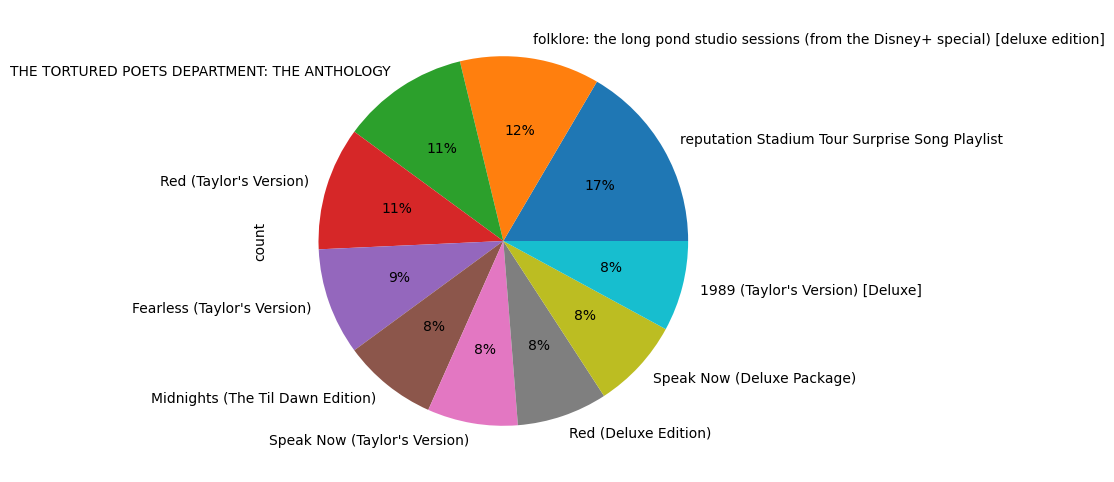

In [6]:
ts['album'].value_counts().head(10).plot.pie(figsize=(6,6), autopct='%1.0f%%')

Berdasarkan diagram pie diatas, total lagu terbanyak dirilis pada album reputation Stadium Tour sebanyak 17%. Urutan kedua ada folklore 12%, kemudian ketiga album TTPD dan Red sebesar 11%, Fearless 9% dan total lagu paling sedikit rilisnya sebesar 8%.

In [7]:
# Mengecek missing value
ts.isna().sum()

Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [8]:
# Drop non-numeric columns
numeric_ts = ts.select_dtypes(include=['number'])

In [9]:
# Melihat Ringkasan Data
numeric_ts.describe()

,Unnamed: 0,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,566.0000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000
mean,282.5000,11.505300,0.339321,0.579615,0.564313,0.003420,0.161904,-7.677049,0.056980,122.758375,0.388005,59.035336,239913.636042
std,163.5344,8.102822,0.328437,0.115524,0.191668,0.028179,0.137951,2.930511,0.071724,30.498432,0.194549,16.765076,46144.105636
min,0.0000,1.000000,0.000182,0.175000,0.118000,0.000000,0.033500,-17.932000,0.023100,68.097000,0.038400,0.000000,83253.000000
25%,141.2500,5.000000,0.039000,0.514250,0.415500,0.000000,0.097100,-9.467000,0.030325,96.908250,0.228000,46.000000,211813.000000
50%,282.5000,10.000000,0.198000,0.592500,0.568000,0.000002,0.114500,-7.361500,0.037700,119.375000,0.371000,62.000000,235340.000000
75%,423.7500,16.000000,0.664000,0.653000,0.718500,0.000048,0.161000,-5.447000,0.054900,143.941750,0.519000,70.000000,260819.500000
max,565.0000,46.000000,0.971000,0.897000,0.948000,0.333000,0.931000,-1.927000,0.912000,208.918000,0.943000,95.000000,613026.000000


> Melihat korelasi antar variabel yang sudah dipilih

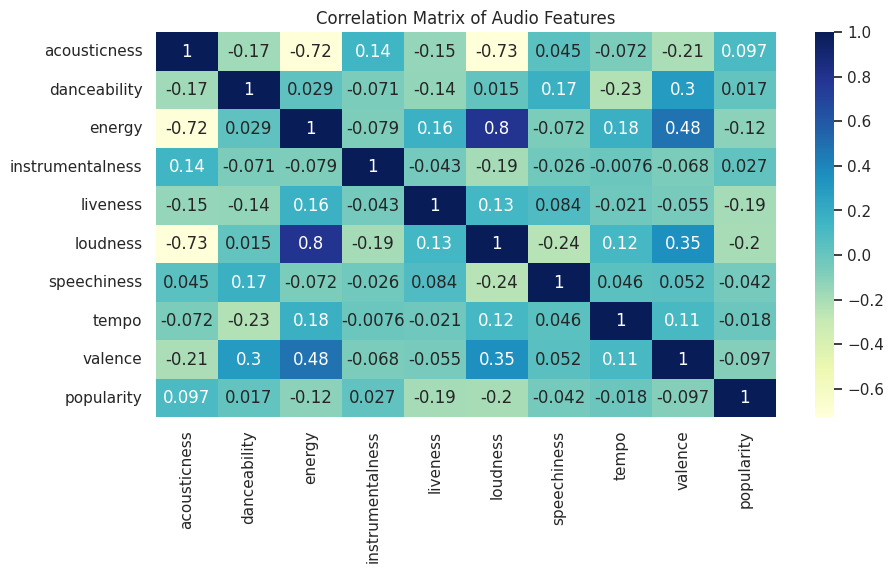

In [10]:
plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")
var = numeric_ts[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']]
corr = var.corr()
sns.heatmap(corr,annot=True,cmap="YlGnBu")
plt.title('Correlation Matrix of Audio Features')
plt.show()

> Korelasi positif terjadi apabila variabel dependen dan variabel independen berjalan dengan paralel atau searah, dan sebaliknya jika korelasinya negatif maka arah hubungannya berlawanan. korelasi positif ditampilkan dengan warna navy, sedangkan korelasi negatif berwarna cream. Semakin pudar warna tersebut, semakin kecil korelasinya, menunjukkan hubungan yang lebih lemah antara variabel-variabel tersebut. Jika visualisasi dilihat lebih detail, terdapat 3 korelasi antar 2 variabel yang positif yang mempengaruhi tingkat kepopuleran lagu.

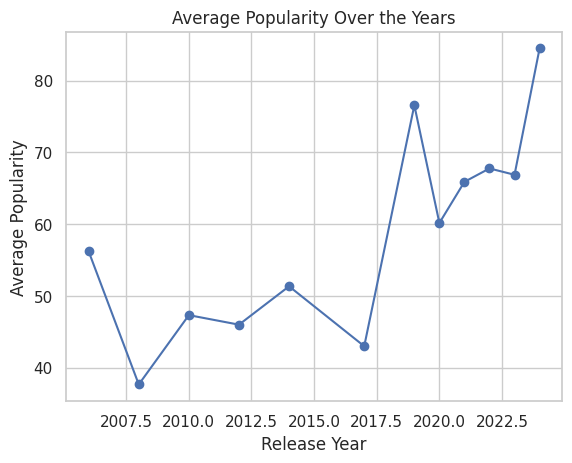

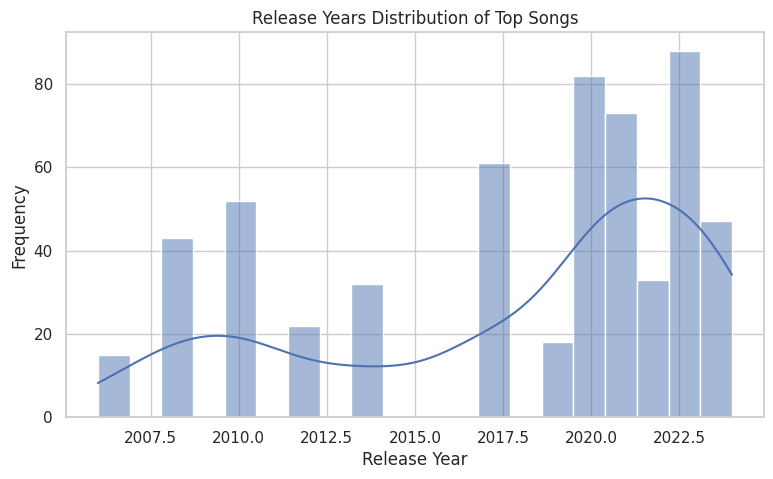

In [14]:
# Release Date Analysis
ts['release_date'] = pd.to_datetime(ts['release_date'])
ts['release_year'] = ts['release_date'].dt.year
yearly_avg_popularity = ts.groupby('release_year')['popularity'].mean()
yearly_avg_popularity.plot(marker='o')
plt.title('Average Popularity Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.show()

# Top Songs berdasarkan Release Year Distribution
plt.figure(figsize=(9, 5))
sns.histplot(ts['release_year'], bins=20, kde=True)
plt.title('Release Years Distribution of Top Songs')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

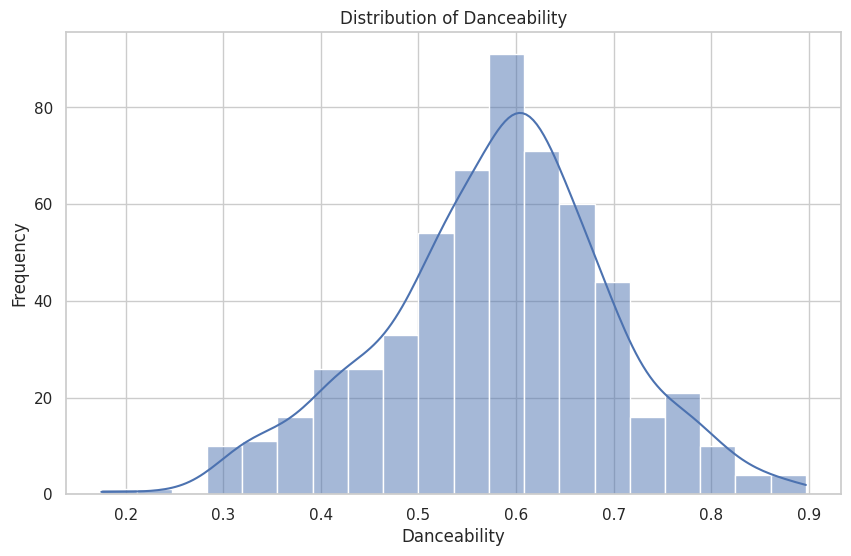

In [15]:
# Distribution of Danceability
plt.figure(figsize=(10, 6))
sns.histplot(ts['danceability'], bins=20, kde=True)
plt.title('Distribution of Danceability')
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.show()

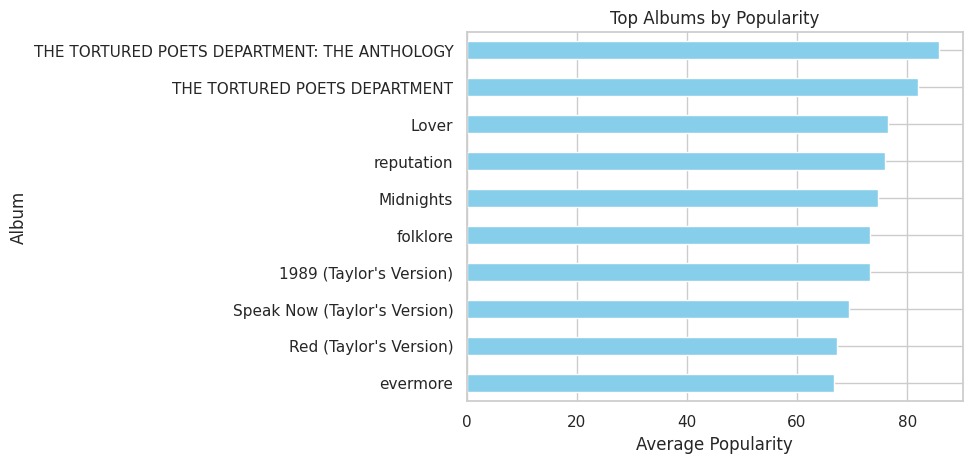

<ipython-input-16-30f3092186bd>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='popularity', y='name', data=top_songs, palette='Blues_d')


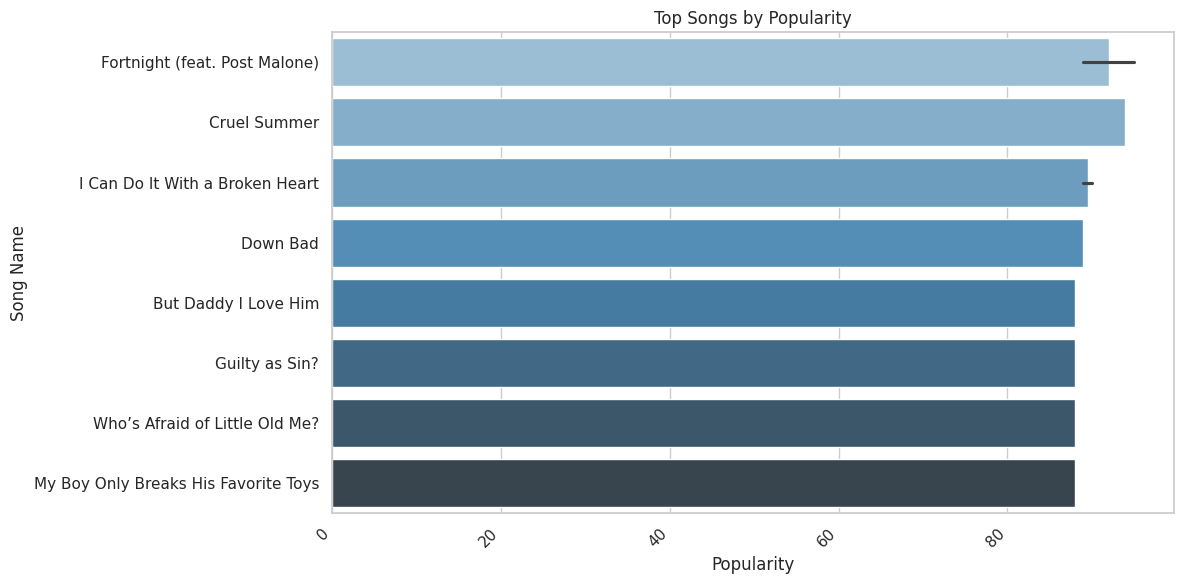

In [16]:
# Top Most Popular Albums
top_albums = ts.groupby('album')['popularity'].mean().sort_values(ascending=False).head(10)

# Reverse the order of the DataFrame
top_albums = top_albums[::-1]

top_albums.plot(kind='barh', color='skyblue')
plt.title('Top Albums by Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Album')
plt.show()

# Top Songs
top_songs = ts.sort_values(by='popularity', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='popularity', y='name', data=top_songs, palette='Blues_d')
plt.title('Top Songs by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Song Name')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


> Berdasarkan grafik visualisasi diatas, yang menempati urutan pertama pada 10 album berdasarkan tingkat popularitas adalah album TTPD, untuk lagu yang menempati urutan pertama berdasarkan tingkat popularitas dimenangkan oleh lagu dengan judul"fortnight".

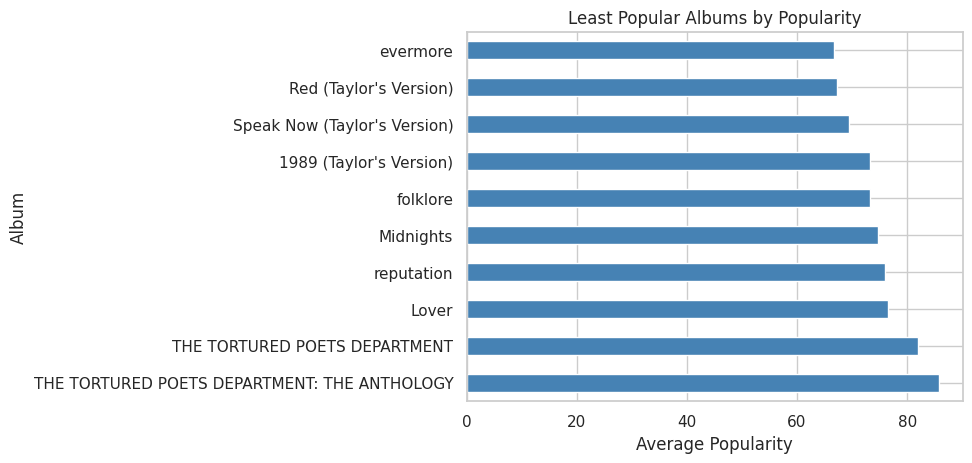

In [17]:
# Visualisasi album paling tidak populer
least_popular_albums = ts.groupby('album')['popularity'].mean().sort_values(ascending=False).head(10)
least_popular_albums.plot(kind='barh', color='#4682B4')
plt.title('Least Popular Albums by Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Album')
plt.show()

<ipython-input-18-fd959bd9a60c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='popularity', y='name', data=least_popular_songs, palette='viridis')


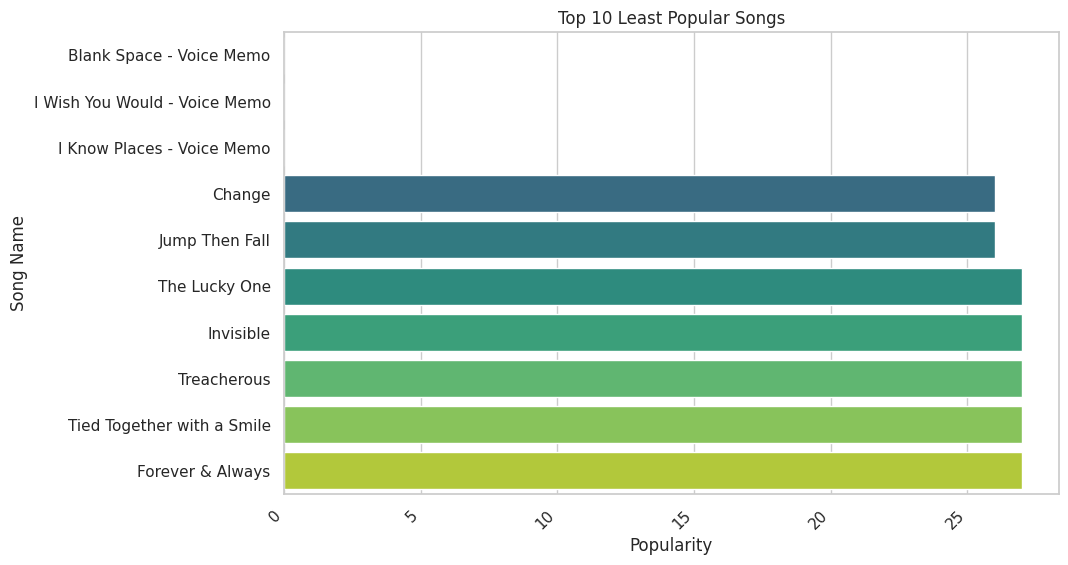

In [18]:
# Visualisasi identifikasi "the least popular songs"
least_popular_songs = ts.sort_values(by='popularity').head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='popularity', y='name', data=least_popular_songs, palette='viridis')
plt.title('Top 10 Least Popular Songs')
plt.xlabel('Popularity')
plt.ylabel('Song Name')
plt.xticks(rotation=45, ha='right')
plt.show()

# Feature Engineering

In [19]:
ts['album'].value_counts()

album
reputation Stadium Tour Surprise Song Playlist                                         46
folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]    34
THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY                                           31
Red (Taylor's Version)                                                                 30
Fearless (Taylor's Version)                                                            26
Midnights (The Til Dawn Edition)                                                       23
Speak Now (Taylor's Version)                                                           22
Red (Deluxe Edition)                                                                   22
Speak Now (Deluxe Package)                                                             22
1989 (Taylor's Version) [Deluxe]                                                       22
1989 (Taylor's Version)                                                                21
Midn

In [20]:
# Mengkonversi release_date ke format datetime type
ts['release_date'] = pd.to_datetime(ts['release_date'])

In [21]:
# Membuat features untuk setiap day/month/year setiap lagu dirilis.
month_of_release = ts['release_date'].dt.month
day_of_month =ts['release_date'].dt.day
year_of_release = ts['release_date'].dt.year

In [22]:
# Hapus beberapa kolom yang tidak diperlukan yang tidak diperlukan saat membuat model
df = pd.DataFrame(ts.drop(columns=['name', 'id', 'uri']))

In [23]:
# one hot encode kolom album
ohe_album = pd.get_dummies(df['album'])

In [24]:
# Create a Features table
features = pd.DataFrame({
    'track_number' : ts['track_number'],
    'acousticness' : ts['acousticness'],
    'danceability' : ts['danceability'],
    'energy' : ts['energy'],
    'instumentalness' : ts['instrumentalness'],
    'liveness' : ts['liveness'],
    'loudness' : ts['loudness'],
    'speechiness' : ts['speechiness'],
    'tempo' : ts['tempo'],
    'valence' : ts['valence'],
    'duration_ms' : ts['duration_ms'],
    'month_of_release' : month_of_release,
    'day_of_month' : day_of_month,
    'year_of_release': year_of_release
})

In [25]:
# first step: include single feature values only
final_df = pd.concat([features, ohe_album], axis=1)
final_df.head()

,track_number,acousticness,danceability,energy,instumentalness,liveness,loudness,speechiness,tempo,valence,...,THE TORTURED POETS DEPARTMENT,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,Taylor Swift,evermore,evermore (deluxe version),folklore,folklore (deluxe version),folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition],reputation,reputation Stadium Tour Surprise Song Playlist
0,1,0.5020,0.504,0.386,0.000015,0.0961,-10.976,0.0308,192.004,0.281,...,False,True,False,False,False,False,False,False,False,False
1,2,0.0483,0.604,0.428,0.000000,0.1260,-8.441,0.0255,110.259,0.292,...,False,True,False,False,False,False,False,False,False,False
2,3,0.1370,0.596,0.563,0.000000,0.3020,-7.362,0.0269,97.073,0.481,...,False,True,False,False,False,False,False,False,False,False
3,4,0.5600,0.541,0.366,0.000001,0.0946,-10.412,0.0748,159.707,0.168,...,False,True,False,False,False,False,False,False,False,False
4,5,0.7300,0.423,0.533,0.002640,0.0816,-11.388,0.3220,160.218,0.248,...,False,True,False,False,False,False,False,False,False,False


In [26]:
final_df.columns = final_df.columns.str.replace(' ', '_')
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 42 columns):
 #   Column                                                                               Non-Null Count  Dtype  
---  ------                                                                               --------------  -----  
 0   track_number                                                                         566 non-null    int64  
 1   acousticness                                                                         566 non-null    float64
 2   danceability                                                                         566 non-null    float64
 3   energy                                                                               566 non-null    float64
 4   instumentalness                                                                      566 non-null    float64
 5   liveness                                                                             566 non

In [27]:
X_train, X_test, y_train, y_test = train_test_split(final_df, ts['popularity'], test_size=0.1, random_state=42)

In [28]:
# Check the lengths of training/test data is as expected
print("Length of the X_train:", X_train.shape)
print("Length of the y_train:", y_train.shape)
print("Length of the X_test:", X_test.shape)
print("Length of the y_test:", y_test.shape)

Length of the X_train: (509, 42)
Length of the y_train: (509,)
Length of the X_test: (57, 42)
Length of the y_test: (57,)


# Model Evaluation

In [29]:
# These will be used later for Model Comparision
names, mses, rmses, r2s = [], [], [], []

In [31]:
def display_metrics(y_test, y_preds, model_type):
    mse = mean_squared_error(y_test, y_preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_preds)
    result = f'''
    {model_type} MSE  : {mse}
    {model_type} RMSE : {rmse}
    {model_type} R^2  : {r2}
    '''

    names.append(model_type)
    mses.append(mse)
    rmses.append(rmse)
    r2s.append(r2)

    print(result)

## Regresi Linear

In [34]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

In [35]:
display_metrics(y_test, lr_preds, "Linear Regression")


    Linear Regression MSE  : 67.55735875021236
    Linear Regression RMSE : 8.21932836369325
    Linear Regression R^2  : 0.759349602362672
    


## Elastic Net Regression

In [36]:
elr = ElasticNet(alpha=0.1, random_state=42)
elr.fit(X_train, y_train)
elr_preds = elr.predict(X_test)

In [37]:
display_metrics(y_test, elr_preds, "Elastic Net Regression")


    Elastic Net Regression MSE  : 91.1689400425359
    Elastic Net Regression RMSE : 9.548242772496723
    Elastic Net Regression R^2  : 0.6752412752764552
    


## Support Vector Regressor

In [38]:
svr = SVR()
svr.fit(X_train, y_train)
svr_preds = svr.predict(X_test)

In [39]:
display_metrics(y_test, svr_preds, "Support Vector Regressor")


    Support Vector Regressor MSE  : 280.12303767212666
    Support Vector Regressor RMSE : 16.73687658053696
    Support Vector Regressor R^2  : 0.0021557732530270712
    


## Decision Tree

In [40]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
dtr_preds = dtr.predict(X_test)

In [41]:
display_metrics(y_test, dtr_preds, "Decision Tree Regressor")


    Decision Tree Regressor MSE  : 67.7719298245614
    Decision Tree Regressor RMSE : 8.232370850767195
    Decision Tree Regressor R^2  : 0.7585852649859772
    


## Random Forest

In [42]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [43]:
display_metrics(y_test, rf_preds, "Random Forest Regressor")


    Random Forest Regressor MSE  : 63.20624736842107
    Random Forest Regressor RMSE : 7.950235680055093
    Random Forest Regressor R^2  : 0.7748489750966465
    


## Gradient Boosting

In [44]:
params = {'n_estimators': 660,
          'max_depth': 3,
          'min_samples_split': 3,
          'min_samples_leaf': 2,
          'learning_rate': 0.01
         } # instantiate and train the model
gbd_reg = ensemble.GradientBoostingRegressor(**params)
gbd_reg.fit(X_train, y_train)
gbd_preds = gbd_reg.predict(X_test)

In [45]:
display_metrics(y_test, gbd_preds, "Gradient Boosting Descent")


    Gradient Boosting Descent MSE  : 59.405381943470886
    Gradient Boosting Descent RMSE : 7.7074886923998065
    Gradient Boosting Descent R^2  : 0.7883882814401966
    


> Selanjutnya akan dilakukan visualisasi untuk melihat bagaimana kinerja model Gradient Boosting berevolusi seiring dengan jumlah iterasi (boosting iterations). Ini membantu dalam mengidentifikasi apakah model terlalu kompleks (overfitting) atau terlalu sederhana (underfitting) dan juga membantu dalam memantau kapan model mencapai performa yang stabil pada data uji.

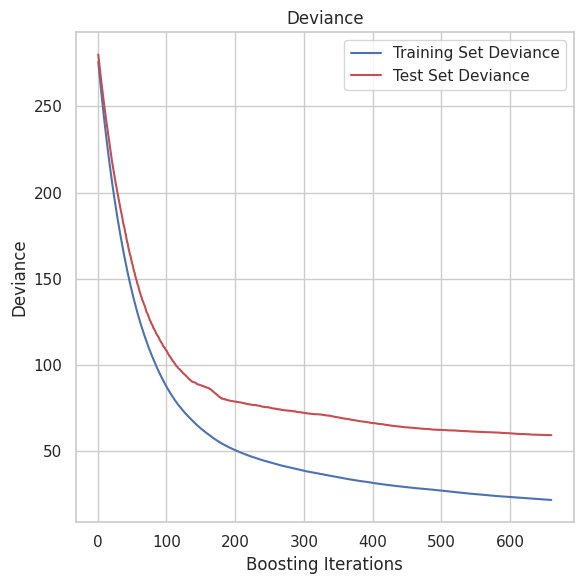

In [46]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(gbd_reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    gbd_reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

> Kesimpulan:

- Model menunjukkan kinerja yang baik pada iterasi awal, tetapi terlalu banyak iterasi boosting menyebabkan overfitting.
- Jumlah iterasi boosting yang optimal kemungkinan berada di sekitar 200 iterasi, di mana deviasi pada set pengujian masih menurun dengan kecepatan yang layak.
- Disarankan untuk menggunakan teknik validasi silang atau early stopping untuk menentukan jumlah iterasi optimal guna mencegah overfitting.

## XGB Regressor

In [47]:
# Need to strip out []'s from the column names
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]

In [48]:
xgb = xg.XGBRegressor()
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

In [49]:
display_metrics(y_test, xgb_preds, "XGB Regressor")


    XGB Regressor MSE  : 70.54709195169869
    XGB Regressor RMSE : 8.399231628649057
    XGB Regressor R^2  : 0.7486996821011735
    


# Visualisasi Perbandingan Model

In [50]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=1,cols=3, subplot_titles=('MSE', "RMSE", "R2"))

fig.add_bar(x=names, y=mses, row=1, col=1)
fig.add_bar(x=names, y=rmses, row=1, col=2)
fig.add_bar(x=names, y=r2s, row=1, col=3)

Penjelasan Metrik:
1. Mean Squared Error (MSE): untuk mengukur rata-rata kuadrat kesalahan. Nilai MSE yang lebih rendah menunjukkan bahwa model memiliki kesalahan yang lebih kecil.

2. Root Mean Squared Error (RMSE): merupakan akar kuadrat dari MSE, yang mengembalikan unit metrik ke skala yang sama dengan data asli. Nilai RMSE yang lebih rendah juga menunjukkan performa yang lebih baik.

3. R Kuadrat (coefficient of determination): digunakan unrtuk mengukur proporsi variansi dalam data dependen yang dapat dijelaskan oleh model. Nilai R kuadrat berkisar antara 0 dan 1, di mana nilai mendekati 1 menunjukkan bahwa model lebih baik dalam menjelaskan variabilitas data.



---



In [51]:
# Membuat tabel menggunakan Plotly
import plotly.graph_objects as go

results = pd.DataFrame({'Model': names, 'MSE': mses, 'RMSE': rmses, 'R^2': r2s})
fig = go.Figure(data=[go.Table(
    header=dict(values=list(results.columns),
                fill_color='lightblue',
                align='center',
                font=dict(color='black', size=12)),
    cells=dict(values=[results.Model, results.MSE, results.RMSE, results["R^2"]],
               fill_color='lavender',
               align='left',
               font=dict(color='black', size=12)))
])

# Menampilkan tabel
fig.show()

**Kesimpulan:**

1. Model dengan Performa Terbaik: **Gradient Boosting Descent** menunjukkan performa terbaik dengan MSE dan RMSE terendah serta R kuadrat tertinggi.

2. Model dengan Performa Baik: **Random Forest Regressor** juga menunjukkan performa yang sangat baik.

3. Model dengan Performa Sedang: **Linear Regression**, **Decision Tree Regressor**, dan **XGB Regressor** memiliki performa yang baik dan cukup seimbang.

4. Model dengan Performa Kurang: **Elastic Net Regression** menunjukkan performa yang lebih rendah dibandingkan yang lain.

5. Model dengan Performa Buruk: **Support Vector Regressor** menunjukkan performa yang paling buruk untuk dataset ini.

Dengan hasil analisa matriks ini dapat memilih model *Gradient Boosting Descent* atau *Random Forest Regressor* untuk analisis kali ini, karena mereka memberikan performa terbaik.

# Menyelidiki Model Gradient Boosting yang Ditingkatkan secara lebih detail

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

# Langkah 1: Pengumpulan Data
data = pd.read_csv('taylor_swift_spotify.csv')

# Langkah 2: Pra-pemrosesan Data
data = data.dropna()

# Mengonversi 'release_date' ke format datetime
data['release_date'] = pd.to_datetime(data['release_date'])

# Membuat fitur tambahan dari 'release_date'
data['release_year'] = data['release_date'].dt.year
data['release_month'] = data['release_date'].dt.month
data['release_day'] = data['release_date'].dt.day

# Menghapus kolom yang tidak diperlukan
data = data.drop(columns=['name', 'album', 'release_date', 'id', 'uri'])

# Mendefiniskan Fitur dan target lebih detail untuk prediksi popularitas lagu
features = data.drop(columns=['popularity'])
target = data['popularity']

# Memecah dataset menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Identifikasi fitur numerik dan kategorikal
numerical_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'duration_ms', 'track_number', 'release_year', 'release_month', 'release_day']
categorical_features = []

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Langkah 3: Pelatihan Model
# Mendefinisikan parameter untuk Gradient Boosting Regressor
params = {
    'n_estimators': 660,
    'max_depth': 3,
    'min_samples_split': 3,
    'min_samples_leaf': 2,
    'learning_rate': 0.01
}

# Membuat pipeline dengan Gradient Boosting Regressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(**params))
])

# Melatih model
model.fit(X_train, y_train)

# Langkah 4: Evaluasi Model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Langkah 5: Prediksi Lagu Baru
new_data = pd.DataFrame({
    'acousticness': [0.5],
    'danceability': [0.8],
    'energy': [0.7],
    'instrumentalness': [0.0],
    'liveness': [0.1],
    'loudness': [-5.0],
    'speechiness': [0.05],
    'tempo': [120],
    'valence': [0.9],
    'duration_ms': [210000],
    'track_number': [1],
    'release_year': [2024],
    'release_month': [7],
    'release_day': [1]
})

# Melakukan preprocessing pada new_data
new_data = preprocessor.transform(new_data)

# Memprediksi popularitas
prediksi_popularitas = model.named_steps['regressor'].predict(new_data)
print(f'Prediksi Popularitas: {prediksi_popularitas[0]}')



Mean Absolute Error: 5.627018846545834
Prediksi Popularitas: 80.34223731942195


Dari output diatas, rata-rata kesalahan prediksi model terhadap popularitas lagu Taylor Swift adalah sekitar 5.63 (dalam skala yang sesuai dengan popularitas lagu tersebut)dan prediksi popularitas lagu Taylor Swift yang diberikan pada model gradient boosting adalah 80.34 untuk tanggal 1 Juli 2024 dari skala ukuran popularitas berdasarkan data yaitu 0-100.

**Evaluasi model gradient boosting menggunakan cross validation dan plot analisis residual**

## K-Fold Cross-Validation:

Digunakan untuk menghindari overfitting dan memberikan evaluasi yang lebih stabil dengan memvalidasi model pada berbagai subset pada data.

In [65]:
from sklearn.model_selection import cross_val_score

# K-Fold Cross-Validation (misalnya dengan 5 folds)
cv_scores = cross_val_score(model, features, target, cv=5, scoring='neg_mean_absolute_error')
mean_cv_score = -cv_scores.mean()
print(f'Mean Cross-Validated MAE: {mean_cv_score}')


Mean Cross-Validated MAE: 11.723538368168175


## **Analisis Residual**

Digunakan untuk melihat distribusi residual (perbedaan antara nilai aktual dan nilai yang diprediksi) dapat memberikan wawasan tentang kinerja model:

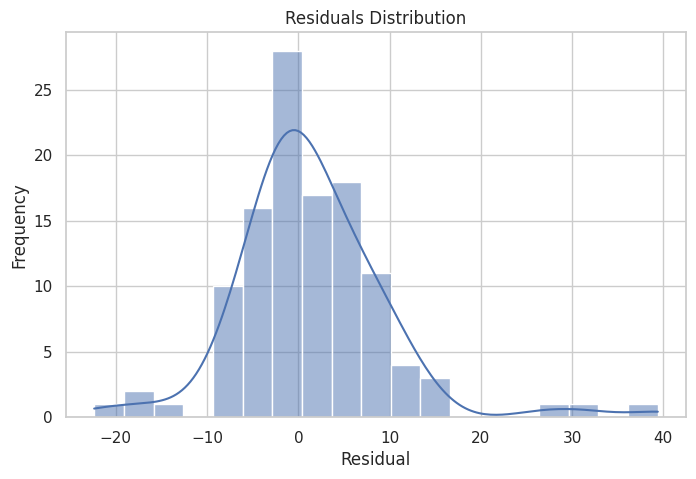

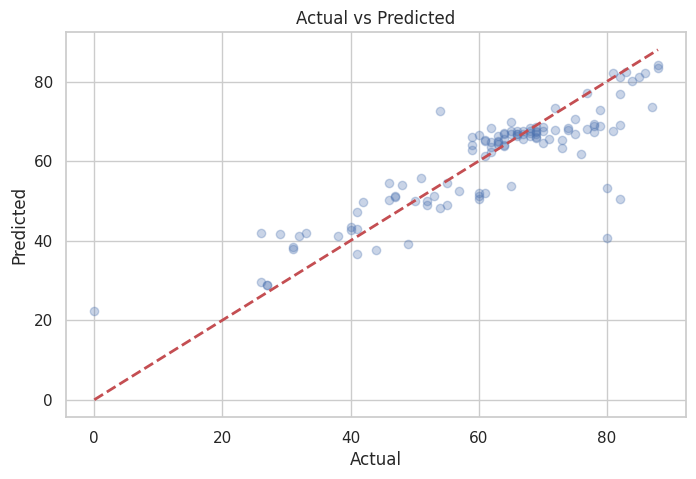

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung residual
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# Plot prediksi vs nilai sebenarnya
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


* Distribusi residual yang normal (berbentuk lonceng)
menunjukkan bahwa model memiliki error yang terdistribusi dengan baik.
* Ketika kita membuat plot prediksi vs nilai sebenarnya, garis y = x digambarkan sebagai garis merah putus-putus. Titik data (scatter plot) diatas yang berada dekat dengan garis merah menunjukkan bahwa nilai yang diprediksi oleh model hampir sama dengan nilai sebenarnya.

* Dalam konteks evaluasi model regresi, tujuan adalah agar titik-titik data sebanyak mungkin berada dekat dengan garis merah, menunjukkan bahwa model mampu memprediksi nilai dengan akurat.




# Unsupervised Learning Menggunakan K-Means Clustering

In [66]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



   Cluster  Total Lagu
0        2         225
1        0         191
2        1         150

Rata-rata Valence dalam setiap Cluster:
cluster
0    0.603482
1    0.291346
2    0.269529
Name: valence, dtype: float64

Rata-rata Energy dalam setiap Cluster:
cluster
0    0.716565
1    0.663460
2    0.368969
Name: energy, dtype: float64


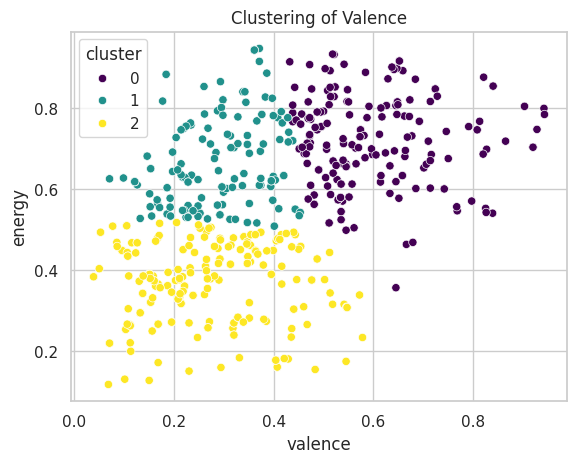

In [67]:
# Melakukan clustering menggunakan K-Means
kmeans = KMeans(n_clusters=3, random_state=0).fit(ts[['valence', 'energy']])
ts['cluster'] = kmeans.labels_

# Menghitung jumlah lagu dalam setiap cluster
cluster_counts = ts['cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Total Lagu']

# Menghitung rata-rata valence dan energy dalam setiap cluster
cluster_valence_means = ts.groupby('cluster')['valence'].mean()
cluster_energy_means = ts.groupby('cluster')['energy'].mean()

# Menampilkan tabel jumlah lagu dalam setiap cluster
print(cluster_counts)

# Menampilkan rata-rata valence dan energy dalam setiap cluster
print("\nRata-rata Valence dalam setiap Cluster:")
print(cluster_valence_means)
print("\nRata-rata Energy dalam setiap Cluster:")
print(cluster_energy_means)

# Visualisasi hasil clustering
sns.scatterplot(data=ts, x='valence', y='energy', hue='cluster', palette='viridis')
plt.title('Clustering of Valence')
plt.show()

Dengan mengamati posisi titik-titik dalam scatter plot, kamu bisa melihat karakteristik umum dari setiap cluster:

- Cluster 0: Jika titik-titik dalam cluster ini cenderung berada di bagian kanan atas scatter plot, berarti cluster ini terdiri dari lagu-lagu dengan valence dan energy tinggi (lagu-lagu yang ceria dan berenergi).

- Cluster 1: Jika titik-titik dalam cluster ini berada di tengah, ini berarti cluster ini mungkin terdiri dari lagu-lagu dengan valence dan energy sedang (balance lah ya istilahnya).

- Cluster 2: Jika titik-titik dalam cluster ini berada di kiri bawah, ini berarti cluster ini terdiri dari lagu-lagu dengan valence dan energy rendah (lagu-lagu yang lebih sedih dan rendah energi).

---
> Interpretasi Hasil
- Cluster 0:
1. Ukuran: Cluster ini memiliki 225 lagu.
2. Rata-rata Valence: 0.603482, yang menunjukkan bahwa lagu-lagu dalam cluster ini cenderung memiliki kepositifan yang cukup tinggi. Lagu-lagu ini mungkin terdengar lebih ceria, bahagia, dan penuh euforia.
3. Rata-rata Energy: 0.716565, yang berarti lagu-lagu dalam cluster ini juga cenderung memiliki tingkat energi yang cukup tinggi. Lagu-lagu ini mungkin memiliki tempo yang lebih cepat dan ritme yang lebih intens.
4. Deskripsi: Cluster 0 terdiri dari lagu-lagu yang energik dan ceria.

- Cluster 1:
1. Ukuran: Cluster ini memiliki 191 lagu.
2. Rata-rata Valence: 0.291346, yang menunjukkan bahwa lagu-lagu dalam cluster ini cenderung memiliki kepositifan yang rendah hingga sedang. Lagu-lagu ini mungkin terdengar lebih netral atau sedikit sedih.
3. Rata-rata Energy: 0.663460, yang berarti lagu-lagu dalam cluster ini cenderung memiliki tingkat energi yang sedang hingga tinggi. Lagu-lagu ini mungkin memiliki tempo yang cukup cepat namun tidak terlalu intens.
4. Deskripsi: Cluster 1 terdiri dari lagu-lagu yang memiliki energi sedang tetapi lebih netral atau sedikit sedih.

- Cluster 2:
1. Ukuran: Cluster ini memiliki 150 lagu.
2. Rata-rata Valence: 0.269529, yang menunjukkan bahwa lagu-lagu dalam cluster ini cenderung memiliki kepositifan yang rendah. Lagu-lagu ini mungkin terdengar lebih sedih, tertekan, atau marah.
3. Rata-rata Energy: 0.368969, yang berarti lagu-lagu dalam cluster ini cenderung memiliki tingkat energi yang rendah. Lagu-lagu ini mungkin memiliki tempo yang lebih lambat dan ritme yang lebih lembut.
4. Deskripsi: Cluster 2 terdiri dari lagu-lagu yang lebih sedih dan berenergi rendah.

> Kesimpulan
Berdasarkan hasil clustering, kita dapat mengelompokkan lagu-lagu ke dalam tiga cluster dengan karakteristik berikut:

- Cluster 0: Lagu-lagu ceria dan energik (225 lagu).
- Cluster 1: Lagu-lagu dengan energi sedang tetapi lebih netral atau sedikit sedih (191 lagu).
- Cluster 2: Lagu-lagu sedih dan berenergi rendah (150 lagu).

Analisis sederhana ini membantu dalam memahami distribusi mood dan energi dari isi lagu-lagu yang ada dalam dataset, serta memberikan panduan untuk mengelompokkan atau merekomendasikan lagu berdasarkan suasana hati yang diinginkan.